# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.132607e+01     7.291123e+00
 * time: 0.004080057144165039
     1     2.991815e+01     5.209831e+00
 * time: 0.01842212677001953
     2     1.997270e+01     5.989682e+00
 * time: 0.03514814376831055
     3     1.525656e+01     4.820723e+00
 * time: 0.05192112922668457
     4     1.161203e+01     1.900313e+00
 * time: 0.06897401809692383
     5     9.795558e+00     1.103495e+00
 * time: 0.08660602569580078
     6     9.249434e+00     1.297294e+00
 * time: 0.10086607933044434
     7     8.892877e+00     8.003172e-01
 * time: 0.11521506309509277
     8     8.637243e+00     5.960991e-01
 * time: 0.12936019897460938
     9     8.482873e+00     5.743507e-01
 * time: 0.1435530185699463
    10     8.440470e+00     9.009396e-01
 * time: 0.15441298484802246
    11     8.373159e+00     7.421978e-01
 * time: 0.1684861183166504
    12     8.288988e+00     5.900122e-01
 * time: 0.18270206451416016
    13     8.232258e+00     6.185911e-01
 * time: 

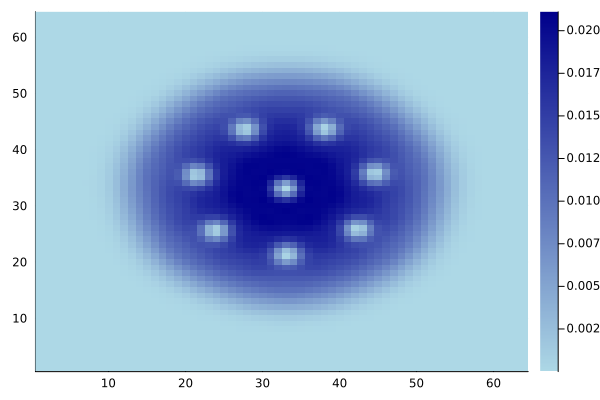

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)